Zadanie 1.

In [33]:
import numpy as np
from scipy import integrate

foo = lambda x: np.e**(-2*x)

# Analitycznie nieoznaczona: -1/2*e^(-2x) oznaczna:  
an = 1/2 - 1/(2*np.e**2)


def rectangle(x_p, x_k, n, f):
    s = 0
    dx = (x_k - x_p) / n
    for i in range(1, n+1):
        s = s + f(x_p + i*dx)
    return s*dx


def trapezium(x_p, x_k, n, f):
    s = 0
    dx = (x_k - x_p) / n
    for i in range(1, n): #Było n+1 zamiast n
        s += f(x_p + i*dx)
    return dx * (s + (f(x_p)+f(x_k))/2)


def simpson(x_p, x_k, n, f):
    s = 0
    s_t = 0
    dx = (x_k - x_p) / n
    for i in range(1, n): #Było n+1 zamiast n
        x = x_p + i * dx
        s_t += f(x - dx/2)
        s += f(x)
    x = x_p + n * dx # w takim razie trzeba dodać to
    s_t += f(x - dx/2)
    return dx/6 * (f(x_p) + f(x_k) + 2*s + 4*s_t)


# metoda prostokątów
rect = rectangle(0, 1, 1, foo)
print("Rectangle method: ", rect)

# metoda prostych trapezów 
simp_trap = trapezium(0, 1, 1, foo)
print("Simple trapezium method: ", simp_trap)

# metoda prosta simpsona
simp_simp = simpson(0, 1, 1, foo)
print("Simple Simpson method: ", simp_simp)

# metoda złożonych trapezów
trap = trapezium(0, 1, 9, foo) #10 podprzedziałów, więc 9 podziałów
print("Complex trapezium method (n=9): ", trap)

# metoda złożona Simpsona
simp = simpson(0, 1, 9, foo)
print("Complex Simpson method (n=9): ", simp)

# metoda Romberga
rom = integrate.romberg(foo, 0, 1, tol=10**(-6), rtol=10**(-6))
print("Romberg method: ", rom)

# metoda quad
quad = integrate.quad(foo, 0, 1)
print("Quad method: ", quad[0])

print("Analitic method: ", an)

Rectangle method:  0.1353352832366127
Simple trapezium method:  0.5676676416183064
Simple Simpson method:  0.4344755079870637
Complex trapezium method (n=9):  0.43411004129173747
Complex Simpson method (n=9):  0.43233272392367733
Romberg method:  0.43233235838943557
Quad method:  0.4323323583816936
Analitic method:  0.43233235838169365


Zadanie 2.

In [34]:
from scipy import optimize
from scipy.stats import norm

LEFT = 0.45
NUM_OF_DIVS = 10

to_integrate = lambda t: np.e**(-t**2/2)/np.sqrt(2*np.pi)

f_simp = lambda x: simpson(0, x, NUM_OF_DIVS, to_integrate) - LEFT 
f_trap = lambda x: trapezium(0, x, NUM_OF_DIVS, to_integrate) - LEFT


root_simp = optimize.newton(f_simp, 0.5, to_integrate, tol=10**(-5))
root_trap = optimize.newton(f_trap, 0.5, to_integrate, tol=10**(-5))

print("Root using Simpson method (n={1}): {0}".format(root_simp, NUM_OF_DIVS))
print("Root using trapezium method (n={1}): {0}".format(root_trap, NUM_OF_DIVS))
print("Reference value: {0}".format(norm.ppf(norm.cdf(0) + LEFT)))

Root using Simpson method (n=10): 1.644853505454346
Root using trapezium method (n=10): 1.648576416802482
Reference value: 1.6448536269514722


Zadanie 3.

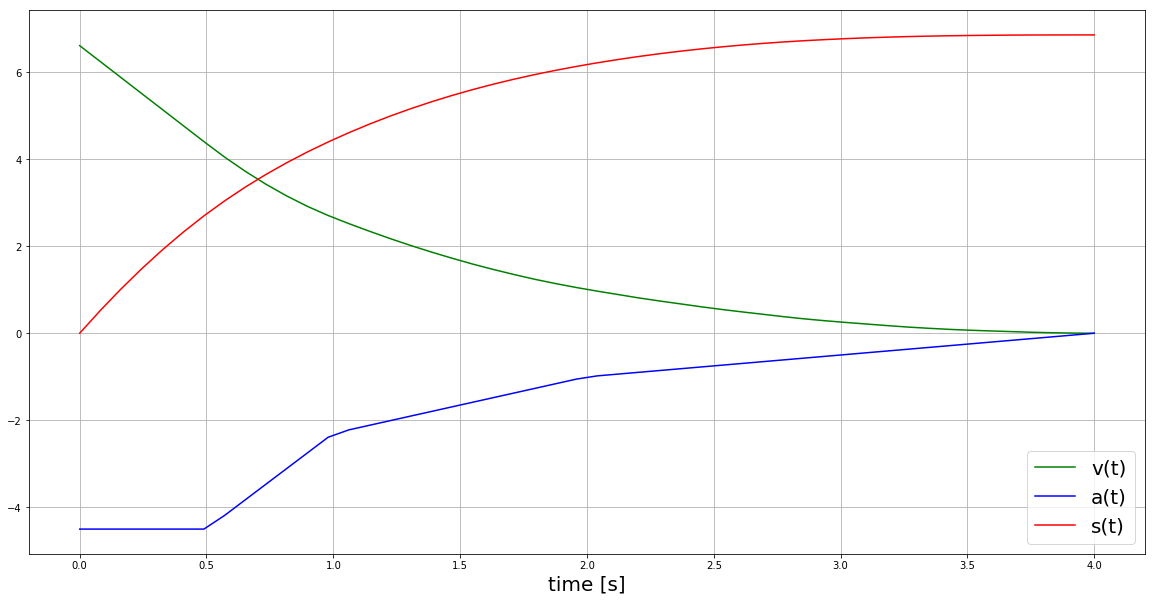

Braking distance: 6.854371333333334 m
Average speed:  5.482333333333332 m/s


In [37]:
import scipy.interpolate as si
import matplotlib.pyplot as plt

t = [0, 0.5, 1.0, 2.0, 3.0, 4.0]
a = [-4.5, -4.5, -2.3, -1.0, -0.5, 0.0]

a_func = si.interp1d(t, a)
v_func = lambda x: -simpson(0, 4, 20, a_func)+simpson(0, x, 20, a_func)
s_func = lambda x: simpson(0, x, 20, v_func)

fig, ax1 = plt.subplots(1, 1, figsize=(20, 10))

ax1.plot(np.linspace(0, 4), v_func(np.linspace(0, 4)), color='green')
ax1.plot(np.linspace(0, 4), a_func(np.linspace(0, 4)), color='blue')
ax1.plot(np.linspace(0, 4), s_func(np.linspace(0, 4)), color='red')
ax1.legend(['v(t)', 'a(t)', 's(t)'], fontsize=20)
ax1.set_xlabel('time [s]', fontsize=20)

plt.grid()
plt.show()

print("Braking distance: " + str(s_func(4)) + " m")
print("Average speed: ", s_func(0.5)/0.5, "m/s")


Zadanie 4.

Simpson:  11.084984534623391
Trapezium:  11.08498453462339
Romberg:  15.825159885482952


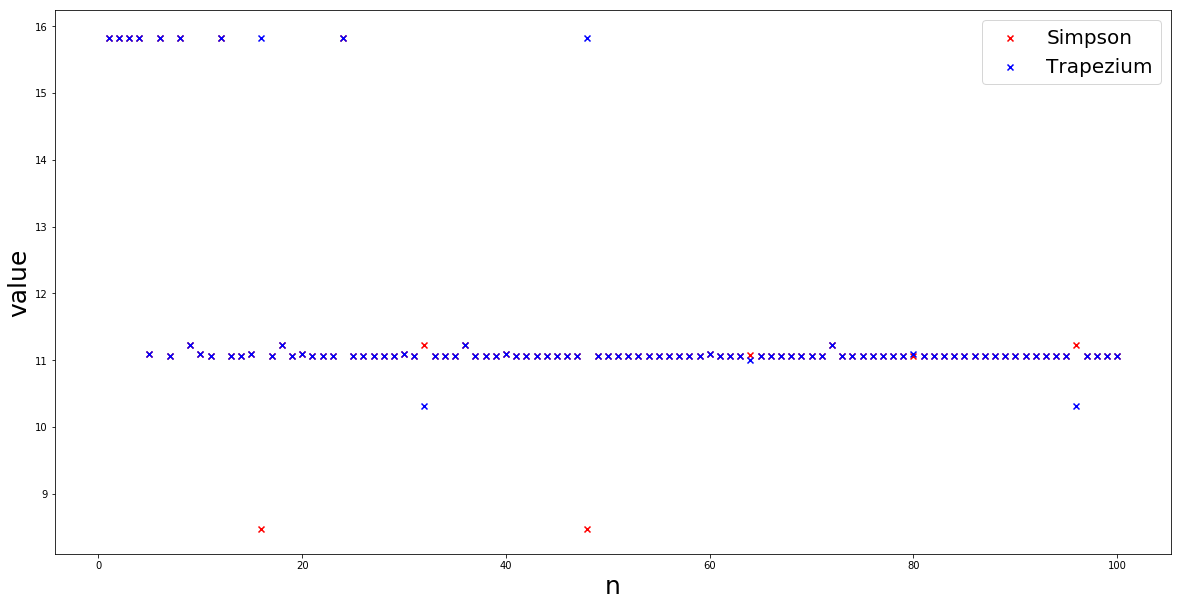

In [43]:
from scipy.misc import derivative

MAX_NUM_OF_DIVS = 100
LENG = 4.8 #Było 4.5 zamiast 4.8
A = 0.1
T = 0.2
f = lambda x: np.sqrt(1+np.power(2*np.pi*A/T*np.cos(2*x*np.pi/T), 2))

print("Simpson: ", simpson(0, LENG, 0, f))
print("Trapezium: ", trapezium(0, LENG, 20, f))
print("Romberg: ", integrate.romberg(f, 0, LENG, tol=10**(-6), rtol=10**(-6)))

n = np.array(range(1,MAX_NUM_OF_DIVS+1)).astype(int)
fig, ax1 = plt.subplots(1, 1, figsize=(20, 10))

s = lambda x: simpson(0, LENG, x, f)

ax1.scatter(n, [simpson(0, LENG, x, f) for x in range(1, MAX_NUM_OF_DIVS+1)], color='red', marker='x')
ax1.scatter(n, [trapezium(0, LENG, x, f) for x in range(1, MAX_NUM_OF_DIVS+1)], color='blue', marker='x')
ax1.set_ylabel('value', fontsize=25)
ax1.set_xlabel('n', fontsize=25)
ax1.legend(['Simpson', 'Trapezium'], fontsize=20)

plt.show()